In [2]:
import os
import pandas as pd
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import datetime
#pd.show_versions(as_json=False)

threshold = 1000

In [3]:
# Load Data
def load_raw(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)
    #del raw['Lat']
    #del raw['Long']
    #raw= raw.replace('Mainland China','China')
    raw = raw[raw.iso2=='US']
    raw = raw[pd.notnull(raw.UID) & ~(raw.Lat==0.0)]
    # fix HI/AK later
    raw = raw[~(raw.Province_State=='Alaska') & ~(raw.Province_State=='Hawaii')]
    return raw

raw = load_raw('time_series_covid19_confirmed_us.csv')
#raw_deaths = load_raw('time_series_covid19_deaths_global.csv')

raw


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
82,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,891,900,909,932,941,949,963,972,988,1010
83,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,2473,2620,2665,2727,2793,2865,2984,3056,3095,3175
84,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,507,516,523,529,535,538,539,550,554,562
85,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,297,312,317,327,330,336,344,355,360,364
86,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,552,569,578,601,607,623,658,685,704,722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,328,333,341,347,353,357,363,369,376,381
3336,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,69,70,70,70,71,79,82,83,87,88
3337,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,2672,2733,2750,2781,2814,2827,2855,2901,2940,2983
3338,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,132,134,137,142,144,146,151,153,162,164


In [4]:

redblue = {}
with open('../other3p/redblue.tsv','r', encoding='utf-8') as rb:
    for l in rb:
        toks = l.strip().split('\t')
        redblue[toks[0]] = float(toks[1])<float(toks[2])
        

In [5]:
#%%capture
%matplotlib inline
from math import log, log10
from collections import Counter
plt.rcParams["figure.figsize"] = [10, 5]
#c=raw['4/19/20'].apply(lambda x: log(x) if x>0 else 0)
date_threshold = pd.to_datetime(['20200716'],format="%Y%m%d")[0]
days = 28
window = 1
dates=raw.columns[-days:]
#print(dates)
new = [(raw[dates[i]]-raw[dates[i-window]]) for i in range(window,len(dates))]
diff = [new[i]-new[i-1] for i in range(1,len(new))]
data = []
for (d,c,dif) in zip(dates[1:],new[1:],diff):
    for (s,c,v,dd) in zip(raw['Province_State'],raw['Admin2'],c,dif):
        if s not in redblue:
            #print(s)
            continue
        rb = redblue[s]        
        v0 = max(0,v)==0
        v1 = int(str(max(0,v))[0])
        vt = v1>3
        l10val = round(log10(v),1) if v>0 else -1
        dec = dd<0
        #print(d)
        dt= pd.to_datetime([d],format="%m/%d/%y")[0]
        data.append((dt,s,c,v,dt<date_threshold,rb,v0,v1,vt,l10val,dec))
        #axis=rb
        #if rb:
        #    axis=s
        #if axis not in hist:
        #    hist[axis]=Counter()
        #hist[axis][v]+=1

print(data[:10])
grouped = pd.DataFrame(data, columns=["Date","State","County", "Value","Before","RedBlue","IsZero","FirstDigit","IsLogTail","Log10Val","Decreasing"])
        


    
#do_bar('Georgia')
#fx=list(sorted(hist[False]))[1:]
#sh = sum([hist[False][x] for x in fx  ])
#fh = [hist[False][x]/sh for x in fx  ]
##ax.bar(np.array(tx,dtype=np.float)-0.2,th,color='red', width=0.2, align='center')
#ax.bar(np.array(fx,dtype=np.float)+0.2,fh,color='blue', width=0.2, align='center')

[(Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Autauga', 7, True, True, False, 7, True, 0.8, True), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Baldwin', 59, True, True, False, 5, True, 1.8, True), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Barbour', 5, True, True, False, 5, True, 0.7, False), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Bibb', 2, True, True, False, 2, False, 0.3, False), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Blount', 7, True, True, False, 7, True, 0.8, True), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Bullock', 1, True, True, False, 1, False, 0.0, False), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Butler', 5, True, True, False, 5, True, 0.7, False), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Calhoun', 16, True, True, False, 1, False, 1.2, False), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Chambers', 4, True, True, False, 4, True, 0.6, False), (Timestamp('2020-07-07 00:00:00'), 'Alabama', 'Cherokee', 8, True, True, False, 8, True, 0.9

In [6]:
#plt.rcParams["figure.figsize"] = [10, 10]
#fig, ax = plt.subplots()
def do_bar(s):
    tx=list(sorted(hist[s]))[1:]
    sh = sum([hist[s][x] for x in tx])
    th = [hist[s][x]/sh for x in tx ]
    ax.bar(np.array(tx,dtype=np.float)-0.2,th,color='red', width=0.2, align='center')


#print((grouped['State']=='Florida') | (grouped['RedBlue']==False))
#grouped[(grouped['State']=='Florida') | (grouped['State']=='Texas') | (grouped['RedBlue']==False)].groupby(['Before','RedBlue'])['Decreasing'].value_counts(normalize=True)
pd.set_option('display.max_rows', None)
#grouped.groupby(['Before','RedBlue'])['Log10Val'].value_counts()
grouped.groupby(['Before','RedBlue'])['Decreasing'].value_counts(normalize=True)

Before  RedBlue  Decreasing
False   False    False         0.628947
                 True          0.371053
        True     False         0.611760
                 True          0.388240
True    False    False         0.653726
                 True          0.346274
        True     False         0.645974
                 True          0.354026
Name: Decreasing, dtype: float64

In [7]:
fips

NameError: name 'fips' is not defined

[183, 105, 90, 134, 104, 75, 93, 129, 128, 118, 90, 110, 84, 83, 114, 107, 131, 141, 126, 105, 92, 134, 127, 148, 163, 126, 76]
['Riverside, California', 'San Joaquin, California', 'Hidalgo, Texas']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

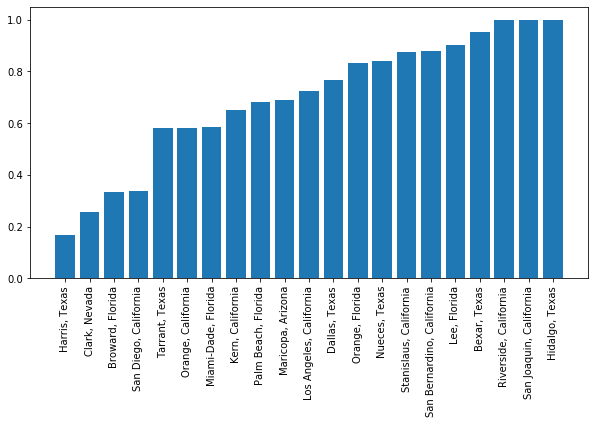

In [24]:

days = 28
window = 1
dates=raw.columns[-days:]
new = [(raw[dates[i]]-raw[dates[i-window]]).clip(0) for i in range(window,len(dates))]
series = {}
for (d,c) in zip(dates,new):
    for (s,c,v) in zip(raw['Province_State'],raw['Admin2'],c):
        div = '{}, {}'.format(c,s)
        if div not in series:
            series[div]=[]
        series[div].append((d,v))
dates = []
p0={}
for div in series:
    amax = np.argmax([v for (_,v) in series[div]])    
    max_val = max([v for (_,v) in series[div]])
    if max_val>1000:
        p0[div] = 1-([v for (_,v) in series[div]][-1]/max_val)
    dates.append(series[div][amax][0])
dates = pd.to_datetime(dates, format='%m/%d/%y')

%matplotlib inline
from math import log, log10
from collections import Counter
plt.rcParams["figure.figsize"] = [10, 5]
hist = Counter(dates)
d = list(sorted(hist))
print([hist[x] for x in d])

#pd.DataFrame(d, [hist[x] for x in d]).plot()
p0 = list(sorted(p0.items(),key=lambda x: x[1]))
at100 = [p[0] for p in p0 if p[1]==1]
print(at100)
x,y = zip(*p0)

plt.bar(x,y)
plt.xticks(rotation=90)
